In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

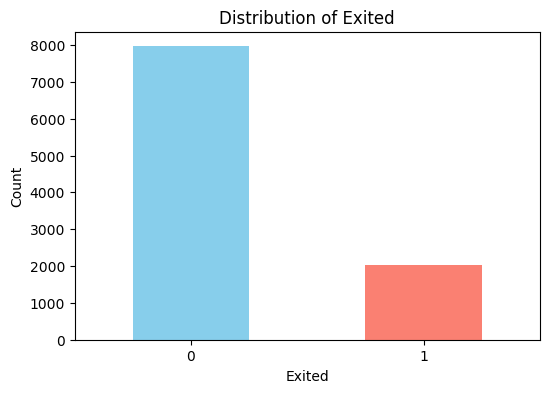

In [3]:
# Load the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

# Display the first few rows and check the columns
print(dataset.head())

# Check for missing values
print(dataset.isnull().sum())

# Summary statistics
print(dataset.describe())

# Check the distribution of the target variable 'Exited' using a bar chart
plt.figure(figsize=(6, 4))
dataset['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [4]:
# Separate features (X) and target variable (y)
X = dataset.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = dataset['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the training and test data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)


In [5]:
# Select numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Display selected numeric features
print("Numeric Features:")
print(numeric_features)

# Define numeric transformer (normalize with StandardScaler)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

# Apply numeric transformer to training data and display first few rows
X_train_numeric_transformed = numeric_transformer.fit_transform(X_train[numeric_features])
print("\nNormalized Numeric Training Data:")
print(X_train_numeric_transformed[:5])  # Display first 5 rows


Numeric Features:
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

Normalized Numeric Training Data:
[[ 0.35649971 -0.6557859   0.34567966 -1.21847056  0.80843615  0.64920267
   0.97481699  1.36766974]
 [-0.20389777  0.29493847 -0.3483691   0.69683765  0.80843615  0.64920267
   0.97481699  1.6612541 ]
 [-0.96147213 -1.41636539 -0.69539349  0.61862909 -0.91668767  0.64920267
  -1.02583358 -0.25280688]
 [-0.94071667 -1.13114808  1.38675281  0.95321202 -0.91668767  0.64920267
  -1.02583358  0.91539272]
 [-1.39733684  1.62595257  1.38675281  1.05744869 -0.91668767 -1.54035103
  -1.02583358 -1.05960019]]


Logistic Regression Model Accuracy: 0.811


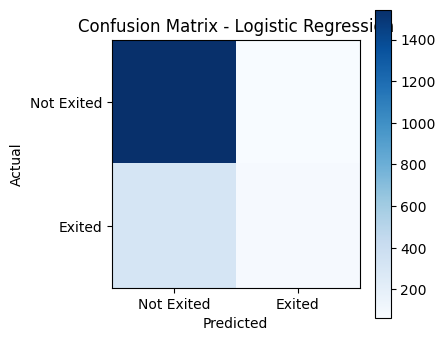

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [6]:
# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train_processed, y_train)

# Predictions on the test set
y_pred_logreg = logreg.predict(X_test_processed)

# Evaluate model performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Model Accuracy:", accuracy_logreg)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred_logreg)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.yticks([0, 1], ['Not Exited', 'Exited'])
plt.show()

# Print classification report for Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))


Random Forest Model Accuracy: 0.8635


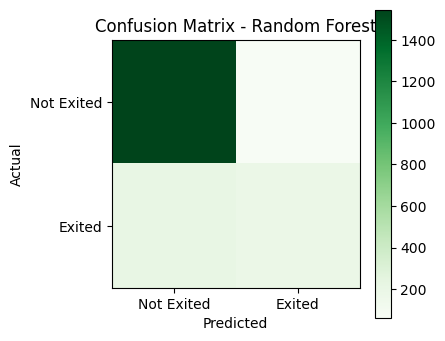

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [7]:
# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_processed, y_train)

# Predictions on the test set
y_pred_rf = rf.predict(X_test_processed)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred_rf)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.yticks([0, 1], ['Not Exited', 'Exited'])
plt.show()

# Print classification report for Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Gradient Boosting Model Accuracy: 0.864


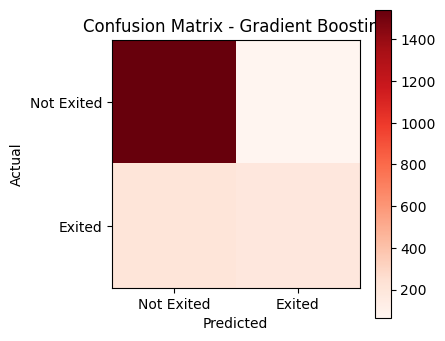

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [8]:
# Initialize Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb.fit(X_train_processed, y_train)

# Predictions on the test set
y_pred_gb = gb.predict(X_test_processed)

# Evaluate model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Model Accuracy:", accuracy_gb)

# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred_gb)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix - Gradient Boosting')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.yticks([0, 1], ['Not Exited', 'Exited'])
plt.show()

# Print classification report for Gradient Boosting
print("Classification Report - Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


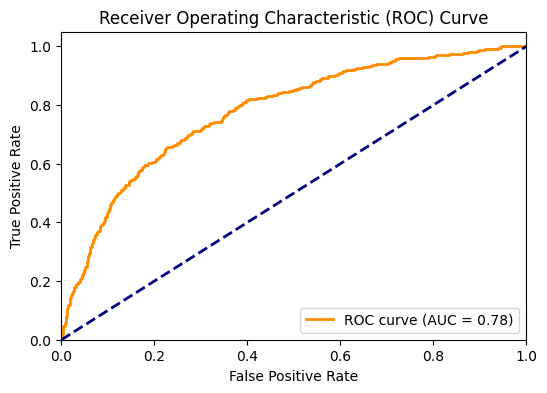

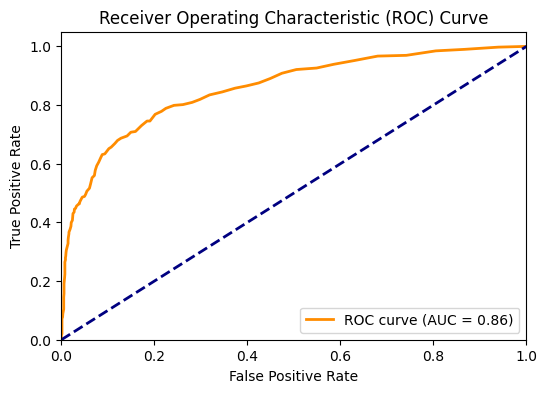

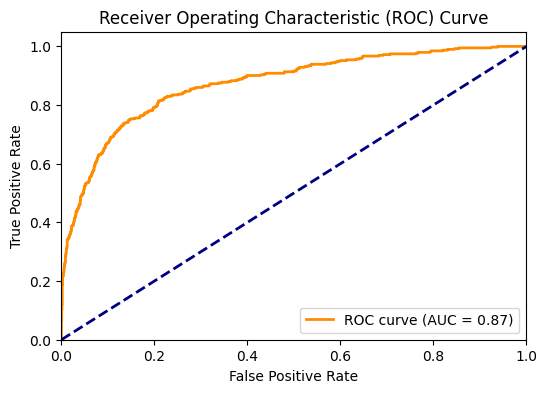

In [9]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for all models
plot_roc_curve(logreg, X_test_processed, y_test)
plot_roc_curve(rf, X_test_processed, y_test)
plot_roc_curve(gb, X_test_processed, y_test)


In [10]:
# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train_processed, y_train)

# Predictions on the test set
y_pred_logreg = logreg.predict(X_test_processed)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Print classification report for Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.811
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [11]:
# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_processed, y_train)

# Predictions on the test set
y_pred_rf = rf.predict(X_test_processed)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report for Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8635
Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [12]:
# Initialize Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb.fit(X_train_processed, y_train)

# Predictions on the test set
y_pred_gb = gb.predict(X_test_processed)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Print classification report for Gradient Boosting
print("Classification Report - Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.864
Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [13]:
# Compare accuracies
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Random Forest Accuracy:", accuracy_rf)
print("Gradient Boosting Accuracy:", accuracy_gb)


Logistic Regression Accuracy: 0.811
Random Forest Accuracy: 0.8635
Gradient Boosting Accuracy: 0.864
